## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].value_counts())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
#duplicate_mouse = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = combined_data.loc[combined_data["Mouse ID"] != "g989"]
combined_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(combined_data_clean["Mouse ID"].value_counts())
mouse_count_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
treatment_group = combined_data_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_summary = treatment_group["Tumor Volume (mm3)"].mean().rename("Mean Tumor Growth").to_frame()
tumor_summary["Median Tumor Growth"] = treatment_group["Tumor Volume (mm3)"].median()
tumor_summary["Variance"] = treatment_group["Tumor Volume (mm3)"].var()
tumor_summary["Standard Deviation"] = treatment_group["Tumor Volume (mm3)"].std()
tumor_summary["Standard Error"] = treatment_group["Tumor Volume (mm3)"].sem()

tumor_summary

,Mean Tumor Growth,Median Tumor Growth,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = combined_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

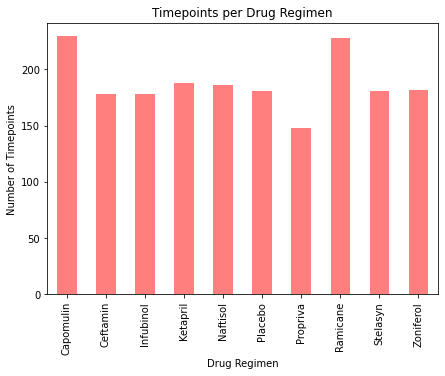

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.figure(figsize = (7,5))
x_axis = np.arange(len(treatment_group["Drug Regimen"]))
tick_locations = [value for value in x_axis]

pandas_bar = plt.bar(x_axis,(treatment_group["Timepoint"].count()), color = 'r', alpha = 0.5, align = "center", width = 0.5)
plt.xticks(tick_locations, tumor_summary.index, rotation = "vertical")

#Graph limits
plt.xlim(-0.5, len(x_axis)-0.5)
# plt.ylim(0, max(treatment_group["Timepoint"].sum()) + 500)

#Labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

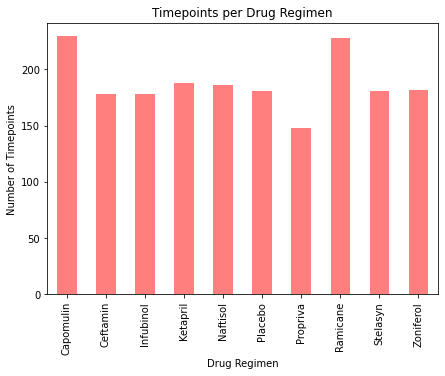

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_timepoint = combined_data_clean[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen")["Timepoint"].count()

drup_timepoint_bar = drug_timepoint.plot(kind = "bar", color = "r", alpha = 0.5, figsize = (7,5), width = 0.5, legend = False)

plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0.5, 1.0, 'Male vs Female mice')

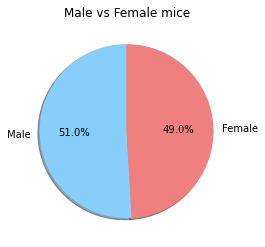

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Male", "Female"]
numbers = [(combined_data_clean["Sex"] == "Male").sum(), (combined_data_clean["Sex"] == "Female").sum()]
colors = ["lightskyblue", "lightcoral"]

pandas_pie = plt.pie(numbers, labels = labels, colors = colors, startangle=90, shadow = True, autopct="%1.1f%%")

plt.title("Male vs Female mice")

Text(0, 0.5, '')

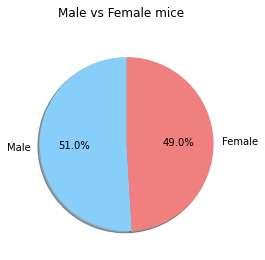

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = combined_data_clean["Sex"].value_counts().to_frame()

male_female_pie = male_female.plot(kind = "pie", title = "Male vs Female mice", startangle=90, shadow = True, 
                 colors = ["lightskyblue", "lightcoral"], subplots = True, legend = False, autopct="%1.1f%%")

plt.ylabel("")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_treatment = combined_data_clean.loc[(combined_data_clean["Drug Regimen"] == "Capomulin") |
                                             (combined_data_clean["Drug Regimen"] == "Ramicane") |
                                             (combined_data_clean["Drug Regimen"] == "Infubinol") |
                                             (combined_data_clean["Drug Regimen"] == "Ceftamin")
                                            ]
#specific_treatment

# Start by getting the last (greatest) timepoint for each mouse
specific_treatment_group = specific_treatment.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].last().to_frame()
#specific_treatment_group

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_and_specific = combined_data.merge(specific_treatment_group, how = "right", on = ["Mouse ID","Timepoint"])
combined_and_specific = combined_and_specific.rename(columns = {"Timepoint":"Last Timepoint"})
combined_and_specific.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [118]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [combined_and_specific["Drug Regimen"].unique()]

#treatments = [x for x in combined_and_specific["Drug Regimen"]]

#treatments = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]

#using list of treatments to pull out final tumor volume?


# Create empty list to fill with tumor vol data (for plotting) (- by treatment drug?)
tumor_vol = []

tumor_vol_Infubinol = []
tumor_vol_Ceftamin = []
tumor_vol_Ramicane = []
tumor_vol_Capomulin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#works:   
tumor_vol_Infubinol = [combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]]
tumor_vol_Ceftamin = [combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]]
tumor_vol_Ramicane = [combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]]
tumor_vol_Capomulin = [combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]]

#tumor_vol_Infubinol = combined_and_specific.query(combined_and_specific['Drug Regimen'] == 'Infubinol')["Tumor Volume (mm3)"]
#tumor_vol_Infubinol = [tumor_vol_Infubinol.append(combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"])
#tumor_vol.append([row[6]]) for row in combined_and_specific if combined_and_specific["Drug Regimen"] == [treatments]

#tumor_vol = tumor_vol.append[combined_and_specific["Tumor Volume (mm3)"].values[0]] for treatments in combined_and_specific["Drug Regimen"] if treatment in treatments

   
#if I was doing a for loop and conditional for each drug:
# for row in combined_and_specific:
#     if combined_and_specific["Drug Regimen"] == "Infubinol":
#         tumor_vol_Infubinol.append([row[6]])
#     elif combined_and_specific["Drug Regimen"] == "Ceftamin":
#         tumor_vol_Ceftamin.append([row[6]])
#     elif combined_and_specific["Drug Regimen"] == "Ramicane":
#         tumor_vol_Ramicane.append([row[6]])
#     elif combined_and_specific["Drug Regimen"] == "Capomulin":
#         tumor_vol_Capomulin.append([row[6]]) 
  

# #for row in combined_and_specific:
#     if combined_and_specific["Drug Regimen"] == "Infubinol" |combined_and_specific["Drug Regimen"] == "Ceftamin" |combined_and_specific["Drug Regimen"] == "Ramicane" |combined_and_specific["Drug Regimen"] == "Capomulin":
#         tumor_vol.append([row[6]])

# for x in range(0, len(combined_and_specific)):
#      tumor_vol = [(for treatment in treatments)]

#     final_tumor_vol = combined_and_specific[["Drug Regimen"] == treatment]
#     tumor_vol.append(final_tumor_vol)
        
    # add subset --?
    
    
    # Determine outliers using upper and lower bounds
# quartiles = combined_and_specific["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
    
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

#treatments
tumor_vol_Capomulin


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64]

TypeError: unhashable type: 'list'

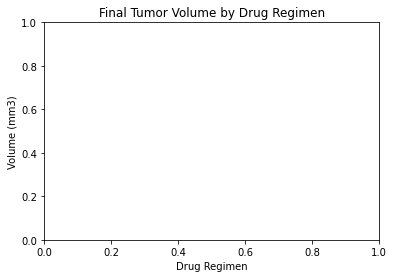

In [135]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
#-- box plot for each drug regimen? or for all combined? -can be either

plot_data = [tumor_vol_Infubinol, tumor_vol_Ceftamin, tumor_vol_Ramicane, tumor_vol_Capomulin]
# plot_df = pd.DataFrame(plot_data)
# plot_df = plot_df.transpose()
#plot_data_df= plot_df.columns["Final_Infubinol", "Final_Ceftamin","Final_Ramicane","Final_Capomulin"]

# ({"Final_Infubinol":tumor_vol_Infubinol, 
#                         "Final_Ceftamin": tumor_vol_Ceftamin,
#                        "Final_Ramicane": tumor_vol_Ramicane,
#                        "Final_Capomulin": tumor_vol_Capomulin})

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Volume (mm3)")
#ax1.boxplot(plot_data)
#ax1 = plot_data.plot(kind = "box", labels = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"])


#labels = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
